In [2]:
# Raw stage #1 loading
import json
from time import time

start_time = time()
with open('data/raw-wiktextract-data.json/raw-wiktextract-data.json', 'r', encoding="utf8") as f:
    all_lines = f.readlines()
print(f"Loaded: {time()-start_time} s")
len_all_lines = len(all_lines)
print(f'Length: {len_all_lines}')

Loaded: 466.544025182724 s
Length: 9566879


In [156]:
json.loads(all_lines[354530])

{'senses': [{'links': [['thank you', 'thank you']],
   'glosses': ['an expression of thankfulness: thank you'],
   'categories': ['Japanese hiragana',
    'Japanese interjections',
    'Japanese lemmas',
    'Japanese links with redundant alt parameters',
    'Japanese links with redundant wikilinks',
    'Japanese terms with IPA pronunciation',
    'Japanese terms with audio links',
    'Japanese terms with redundant sortkeys'],
   'wikipedia': ['Muromachi period']}],
 'pos': 'intj',
 'head_templates': [{'name': 'ja-pos',
   'args': {'1': 'interjection', 'hhira': 'ありがたう'},
   'expansion': 'ありがとう • (arigatō) ^(←ありがたう (arigatau)?)'}],
 'forms': [{'form': 'arigatō', 'tags': ['romanization']},
  {'form': 'arigatau', 'tags': ['romanization']},
  {'form': 'ありがたう', 'roman': 'arigatau', 'tags': ['hiragana', 'historical']}],
 'coordinate_terms': [{'roman': 'dōmo', 'word': 'どうも'},
  {'tags': ['Kansai'], 'roman': 'ōkini', 'word': 'おおきに'},
  {'roman': 'dōmo arigatō', 'word': 'どうもありがとう'},
  {'roma

In [128]:
def simple_count(d, i):
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
    return d

In [139]:
# Count everyhting
symbols_count = {}
bracket_types = {"/": 0, "[": 0}
bracket_types_other = {}
languages = {}
lengths = {}

has_ipa_count = {}
has_audio_count = {}
ipa_audio_pairs = {}

dict_keys = set()
dict_keys_sounds_ipa = set()
dict_keys_sounds_audio = set()
dict_keys_sounds_other = set()

for n, line in enumerate(all_lines):
    dict_line = json.loads(line)
    dict_keys.update(dict_line.keys())
    curr_has_ipa = 0
    curr_has_audio = 0
    if 'lang' in dict_line:
        languages = simple_count(languages, dict_line['lang'])

    if 'sounds' in dict_line:
        curr_sounds = dict_line['sounds']
        for sound in curr_sounds:
            if 'ipa' in sound:
                dict_keys_sounds_ipa.update(sound.keys())
                curr_has_ipa += 1
                sound_ipa = sound['ipa']
                sound_ipa_len = len(sound_ipa)
                
                lengths = simple_count(lengths, sound_ipa_len)

                if sound_ipa[0] in bracket_types:
                    bracket_types[sound_ipa[0]] += 1
                elif sound_ipa[1] in bracket_types:
                    bracket_types[sound_ipa[1]] += 1
                elif sound_ipa[2] in bracket_types:
                    bracket_types[sound_ipa[2]] += 1
                    print(2, n, sound_ipa)
                else:
                    bracket_types_other = simple_count(bracket_types_other, n)
                    print("?", n, sound_ipa)
                
                for notation in sound_ipa:
                    symbols_count = simple_count(symbols_count, notation)
            elif 'audio' in sound:
                dict_keys_sounds_audio.update(sound.keys())
                curr_has_audio += 1
            else:
                dict_keys_sounds_other.update(sound.keys())
                
    has_ipa_count = simple_count(has_ipa_count, curr_has_ipa)
    has_audio_count = simple_count(has_audio_count, curr_has_audio)
    ipa_audio_pairs = simple_count(ipa_audio_pairs, (curr_has_audio, curr_has_ipa))



? 354530 IPA⁽ᵏᵉʸ⁾:


In [143]:
sum(languages.values())

9521214

In [141]:
sorted(languages.items(), key=lambda x: -x[1])

[('English', 1283286),
 ('Latin', 869391),
 ('Spanish', 783055),
 ('Italian', 614246),
 ('Russian', 431071),
 ('French', 392605),
 ('Portuguese', 385581),
 ('German', 338248),
 ('Chinese', 286775),
 ('Finnish', 248350),
 ('Swedish', 241337),
 ('Galician', 201868),
 ('Catalan', 193737),
 ('Japanese', 161685),
 ('Polish', 159074),
 ('Dutch', 133014),
 ('Arabic', 130404),
 ('Latvian', 128762),
 ('Esperanto', 128578),
 ('Romanian', 118192),
 ('Greek', 78255),
 ('Hungarian', 75406),
 ('Norwegian Bokmål', 72966),
 ('Translingual', 71565),
 ('Mandarin', 68789),
 ('Macedonian', 67728),
 ('Serbo-Croatian', 64426),
 ('Norwegian Nynorsk', 61107),
 ('Czech', 53027),
 ('Korean', 51129),
 ('Danish', 48982),
 ('Bulgarian', 47310),
 ('Middle English', 43326),
 ('Ukrainian', 42588),
 ('Vietnamese', 40924),
 ('Ancient Greek', 40325),
 ('Irish', 35189),
 ('Turkish', 33419),
 ('Asturian', 30899),
 ('Hindi', 28776),
 ('Old English', 27491),
 ('Tagalog', 25952),
 ('Lithuanian', 25589),
 ('Icelandic', 23757)

In [166]:
sorted(symbols_count.items(), key=lambda x: -x[1])

[('/', 7360602),
 ('.', 3599751),
 ('ˈ', 3593901),
 ('i', 3421764),
 ('t', 3232709),
 ('a', 3227316),
 ('s', 2547395),
 ('n', 2292111),
 ('[', 2075756),
 (']', 2075756),
 ('k', 1968139),
 ('e', 1832775),
 ('o', 1726609),
 ('u', 1697814),
 (' ', 1684670),
 ('⁵', 1682564),
 ('ː', 1611844),
 ('l', 1450199),
 ('²', 1429604),
 ('m', 1316794),
 ('³', 1273209),
 ('¹', 1211135),
 ('p', 1207983),
 ('r', 1179018),
 ('͡', 1059049),
 ('⁴', 1033612),
 ('d', 976043),
 ('ɪ', 965043),
 ('̯', 915639),
 ('ə', 902552),
 ('ɐ', 853519),
 ('j', 811959),
 ('ɛ', 802264),
 ('ʲ', 799870),
 ('ɑ', 777189),
 ('ɔ', 696444),
 ('ɾ', 694271),
 ('⁻', 688514),
 ('b', 636113),
 ('ŋ', 631957),
 ('ʰ', 600422),
 ('v', 501116),
 ('ˌ', 479700),
 ('̪', 460815),
 ('ɕ', 460106),
 ('ʊ', 459473),
 ('ɡ', 458416),
 ('̞', 452477),
 ('f', 443407),
 ('ʃ', 427844),
 ('z', 411665),
 ('h', 360762),
 ('ɨ', 313667),
 ('w', 299154),
 ('̚', 295158),
 (')', 271414),
 ('(', 271394),
 ('y', 250959),
 ('̠', 250530),
 ('ä', 248995),
 ('ʂ', 240360)

In [155]:
bracket_types_other

{354530: 1}

In [167]:
# Save
import numpy as np

stage = 1
np.save(f'data/stats/{stage}/symbols_count.npy', symbols_count)
np.save(f'data/stats/{stage}/bracket_types.npy', bracket_types)
np.save(f'data/stats/{stage}/bracket_types_other.npy', bracket_types_other)
np.save(f'data/stats/{stage}/languages.npy', languages)
np.save(f'data/stats/{stage}/lengths.npy', lengths)

np.save(f'data/stats/{stage}/has_ipa_count.npy', has_ipa_count)
np.save(f'data/stats/{stage}/has_audio_count.npy', has_audio_count)
np.save(f'data/stats/{stage}/ipa_audio_pairs.npy', ipa_audio_pairs)

np.save(f'data/stats/{stage}/dict_keys.npy', dict_keys)
np.save(f'data/stats/{stage}/dict_keys_sounds_ipa.npy', dict_keys_sounds_ipa)
np.save(f'data/stats/{stage}/dict_keys_sounds_audio.npy', dict_keys_sounds_audio)
np.save(f'data/stats/{stage}/dict_keys_sounds_other.npy', dict_keys_sounds_other)

In [34]:
# Load
import numpy as np

stage = 1
symbols_count = dict(np.load(f'data/stats/{stage}/symbols_count.npy', allow_pickle=True).item())
bracket_types = dict(np.load(f'data/stats/{stage}/bracket_types.npy', allow_pickle=True).item())
bracket_types_other = dict(np.load(f'data/stats/{stage}/bracket_types_other.npy', allow_pickle=True).item())
languages = dict(np.load(f'data/stats/{stage}/languages.npy', allow_pickle=True).item())
lengths = dict(np.load(f'data/stats/{stage}/lengths.npy', allow_pickle=True).item())

has_ipa_count = dict(np.load(f'data/stats/{stage}/has_ipa_count.npy', allow_pickle=True).item())
has_audio_count = dict(np.load(f'data/stats/{stage}/has_audio_count.npy', allow_pickle=True).item())
ipa_audio_pairs = dict(np.load(f'data/stats/{stage}/ipa_audio_pairs.npy', allow_pickle=True).item())

dict_keys = set(np.load(f'data/stats/{stage}/dict_keys.npy', allow_pickle=True).item())
dict_keys_sounds_ipa = set(np.load(f'data/stats/{stage}/dict_keys_sounds_ipa.npy', allow_pickle=True).item())
dict_keys_sounds_audio = set(np.load(f'data/stats/{stage}/dict_keys_sounds_audio.npy', allow_pickle=True).item())
dict_keys_sounds_other = set(np.load(f'data/stats/{stage}/dict_keys_sounds_other.npy', allow_pickle=True).item())

In [289]:
sum([i*j for i, j in has_ipa_count.items()])/(9566879-6788231)

2.071531550595829

In [291]:
sum([i*j for i, j in has_audio_count.items()])/(9566879-8876424)

1.0353853618266216

In [280]:
ok_pairs = []
for i in ipa_audio_pairs:
    if 0 not in i:
        ok_pairs.append(ipa_audio_pairs[i])
sum(ok_pairs)

290617

In [274]:
sum([i*j for i, j in has_ipa_count.items()])

5756057

In [103]:
# languages_list = sorted(languages.items(), key=lambda x: -x[1])
# for i in languages_list:
#     print(i)
import matplotlib.pyplot as plt

def list_sort_other(curr_list, other_percent=0.01):
    curr_list = sorted(curr_list.items(), key=lambda x: -x[1])
    curr_list_values = [i[1] for i in curr_list]
    curr_list_names = [i[0] for i in curr_list]

    curr_total = sum(curr_list_values)
    curr_list_values_other = [i for i in curr_list_values if i / curr_total >= other_percent]
    curr_list_names_other = [curr_list_names[i] for i in range(len(curr_list_values_other))]
    if other_percent > 0:
        curr_list_values_other.append(curr_total - sum(curr_list_values_other))
        curr_list_names_other.append("Other")
    return curr_list_names_other, curr_list_values_other, [i/curr_total*100 for i in curr_list_values_other]

Languages 4538


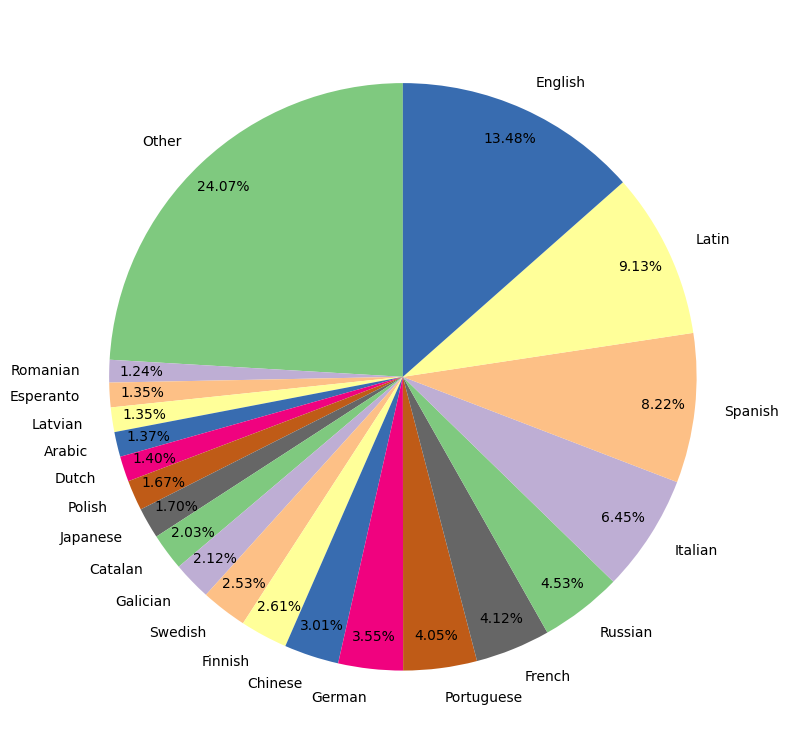

In [240]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), tight_layout=True)
names, vales, _ = list_sort_other(languages, 0.01)
ax.pie(vales[::-1], labels=names[::-1], autopct='%1.2f%%', startangle=90,
       pctdistance=0.89, colors=plt.get_cmap('Accent').colors)
print(f"Languages {len(languages)}")

Symbols graph


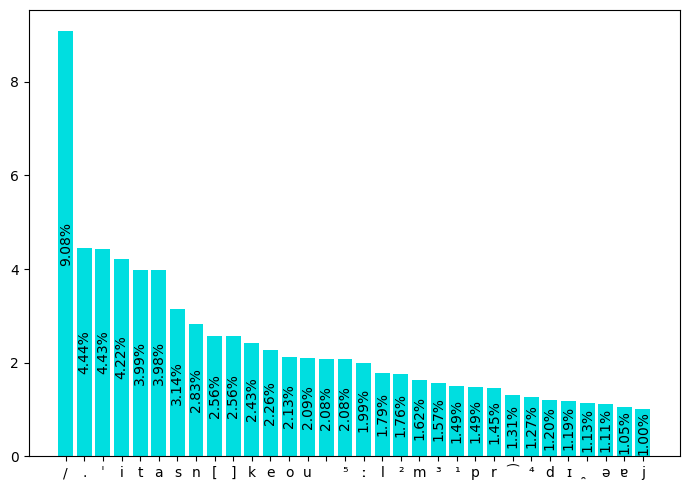

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), tight_layout=True)
names, vales, percentage = list_sort_other(symbols_count, 0.01)
bar = ax.bar(names[:-1:], percentage[:-1:], color='#00deE0')
ax.bar_label(bar, fmt='%1.2f%%', label_type='center', rotation=90)
print("Symbols graph")

Transcriptions lengths
Max: 11 (454333 examples of this amount)
Median: 13 (448889 examples of this amount)


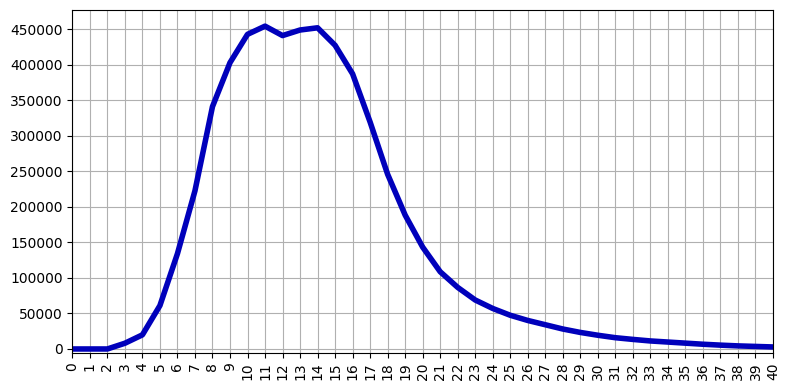

In [242]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), tight_layout=True)
sym_count = sorted(lengths.items())
names = [0]+[i[0] for i in sym_count]
values = [0]+[i[1] for i in sym_count]
ax.plot(names, values, lw=4, color="#0000BB")
ax.set_xlim(left=0, right=40)
ax.set_xticks(np.arange(0, 41, 1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set_xticks(np.arange(0, 41, 1), ax.get_xticklabels(), rotation=45, ha='right')
ax.set_ylim(bottom=-5000)
ax.set_yticks(np.arange(0, max(values), 50000))
ax.grid(True)
print("Transcriptions lengths")

max_length = sorted(lengths.items(), key=lambda x: -x[1])[0]
print(f"Max: {max_length[0]} ({max_length[1]} examples of this amount)")

med_values = [x for xs in [[names[i]]*values[i] for i in range(len(values))] for x in xs]
med_len = len(med_values)
if med_len % 2 == 1:
    med = med_values[med_len // 2]
else:
    med = (med_values[med_len // 2 - 1] + med_values[med_len // 2])/2
    if med % 1 == 0:
        med = int(med)
print(f"Median: {med} ({lengths[med]} examples of this amount)")

In [37]:
crit_epochs = {'thi': [],'spa': [],'lon': [],'str': [],'con': [],'nas': [],'plo': [],'sib': [],'tri': [],'lat': [],'lbz': [],'bil': [],'den': [],'alv': [],'ret': [],'pal': [],'vel': [],'uvu': [],'pha': [],'glo': [],'asp': [],'vls': []}

In [39]:
a = [['thi', 0.52675],
  ['spa', 0.9945],
  ['lon', 0.92654],
  ['str', 0.74643],
  ['con', 0.70542],
  ['nas', 0.83716],
  ['plo', 0.65308],
  ['sib', 0.83618],
  ['tri', 0.89527],
  ['lat', 0.91117],
  ['lbz', 0.77636],
  ['bil', 0.78807],
  ['den', 0.89719],
  ['alv', 0.52471],
  ['ret', 0.92454],
  ['pal', 0.53353],
  ['vel', 0.61792],
  ['uvu', 0.96212],
  ['pha', 0.99968],
  ['glo', 0.96756],
  ['asp', 0.98116],
  ['vls', 0.6436]]
for i in a:
    crit_epochs[i[0]].append(i[1])
crit_epochs

{'thi': [0.31415, 0.52675],
 'spa': [0.99375, 0.9945],
 'lon': [0.92053, 0.92654],
 'str': [0.76867, 0.74643],
 'con': [0.69713, 0.70542],
 'nas': [0.82912, 0.83716],
 'plo': [0.66769, 0.65308],
 'sib': [0.82985, 0.83618],
 'tri': [0.91435, 0.89527],
 'lat': [0.90839, 0.91117],
 'lbz': [0.78008, 0.77636],
 'bil': [0.80187, 0.78807],
 'den': [0.90676, 0.89719],
 'alv': [0.52558, 0.52471],
 'ret': [0.92346, 0.92454],
 'pal': [0.53945, 0.53353],
 'vel': [0.61093, 0.61792],
 'uvu': [0.96486, 0.96212],
 'pha': [0.99605, 0.99968],
 'glo': [0.97271, 0.96756],
 'asp': [0.96306, 0.98116],
 'vls': [0.65195, 0.6436]}

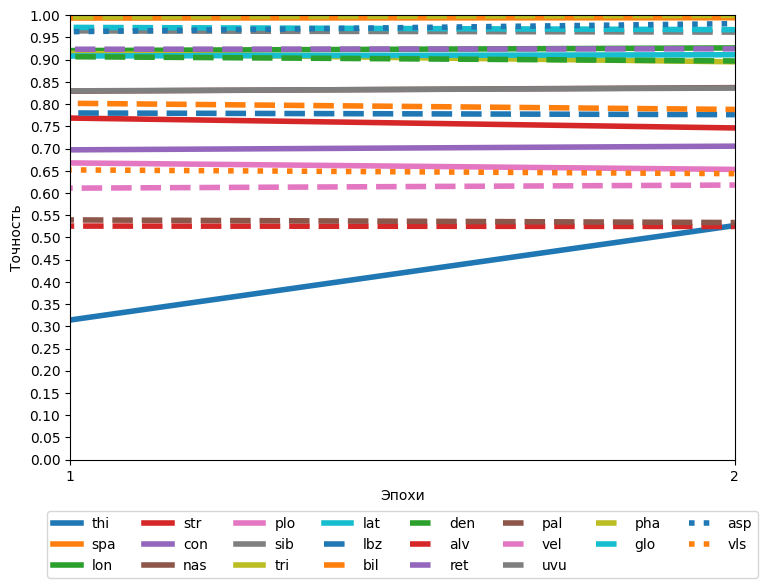

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), tight_layout=True)

line_styles = ['-', '--', ':', '-.']
n = 0
for crit, epochs in crit_epochs.items():
    ax.plot([0]+epochs, label=crit, lw=4, linestyle=line_styles[n//10])
    n += 1
    
ax.set_xlabel('Эпохи')
ax.set_xlim(left=1, right=len(epochs))
ax.set_xticks(np.arange(1, len(epochs)+1, 1))
ax.set_ylabel('Точность')
ax.set_ylim(top=1.0, bottom=0.0)
ax.set_yticks(np.arange(0.0, 1.01, 0.05))
# ax.legend()
ax.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=8)
plt.show()


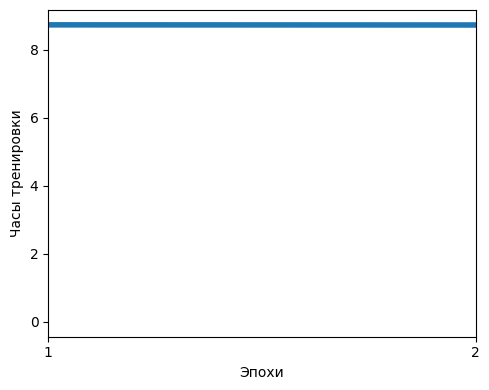

In [43]:
time_epochs = {'train': [8.41495447046227, 9.329195341070493, 10.248053805298275]}
#New
time_epochs = {'train': [8.727760089039803, 8.72372738275263]}

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), tight_layout=True)

line_styles = ['-', '--', ':', '-.']
n = 0
for crit, epochs in time_epochs.items():
    ax.plot([0]+epochs, label=crit, lw=4, linestyle=line_styles[n//10])
    n += 1
    
ax.set_xlabel('Эпохи')
ax.set_xlim(left=1, right=len(epochs))
ax.set_xticks(np.arange(1, len(epochs)+1, 1))
ax.set_ylabel('Часы тренировки')
# ax.set_ylim(top=1.0, bottom=0.0)
# ax.set_yticks(np.arange(0.0, 1.01, 0.05))
# ax.legend()
# ax.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.show()

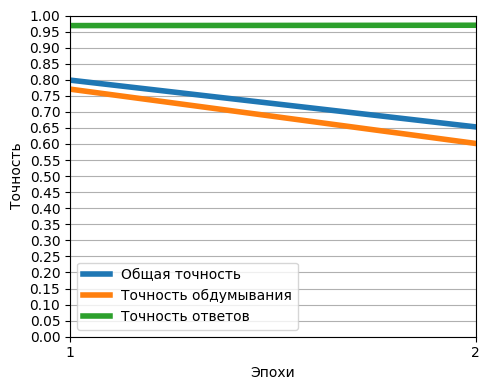

In [41]:
accuracies = {"Общая точность": [0.5892987595561916, 0.8639854826671557, 0.7776110108529226],
              "Точность обдумывания": [0.5278504883919176, 0.845791746385355, 0.7452281312055982],
              "Точность ответов": [0.9715480464184711, 0.9687490729235498, 0.9696606694365433]}
#New
accuracies = {"Общая точность": [0.7988537150848495, 0.6532359482047527],
              "Точность обдумывания": [0.7707703257954078, 0.6016970203091343],
              "Точность ответов": [0.9685728687902947, 0.9696846325674854]} 


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4), tight_layout=True)


line_styles = ['-', '--', ':', '-.']
n = 0
for crit, epochs in accuracies.items():
    ax.plot([0]+epochs, label=crit, lw=4, linestyle=line_styles[n//10])
    n += 1
    
ax.set_xlabel('Эпохи')
ax.set_xlim(left=1, right=len(epochs))
ax.set_xticks(np.arange(1, len(epochs)+1, 1))
ax.set_ylabel('Точность')
ax.set_ylim(top=1.0, bottom=0.0)
ax.set_yticks(np.arange(0.0, 1.01, 0.05))
ax.legend()
ax.grid(True)
# ax.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.show()